# SVM(Support Vector Machine)

##### 1) 简介

+ SVM（Support Vector Machine）：支撑向量机，既可以解决分类问题，又可以解决回归问题；
+ SVM 算法可分为：Hard Margin SVM、Soft Margin SVM，其中 Soft Margin SVM 算法是由 Hard Margin SVM 改进而来；

##### 2）不适定问题

+ 不适定问题：决策边界不唯一，可能会偏向某一样本类型，模型泛化能力较差；
+ 具有不适定问题的模型的特点：决策边界不准确，泛化能力较差；
+ 原因：模型由训练数据集训练所得，训练数据集并没有包含所有类型的所有样本，训练数据集的样本的分布，可能不能准确的反应不同类型的样本分布的真正规律，由训练数据集得到模型，该模型的决策边界也很可能不是真正的分类边界；这样的话，该模型的决策边界会偏向某一样本类型，使模型泛化能力较差。

##### 3）逻辑回归中的 不适定问题

+ 逻辑回归思想：定义一个概率函数，根据概率函数进行建模，形成损失函数，最小化损失函数得到决策边界；
+ 决策边界可能是多种情况
![title](attachment/1.png)

##### 4）SVM 算法的思想

+ 解决“不适定问题”；
+ 目的：找到一个最优决策边界，不仅很好的划分训练数据集，又有很好的泛化能力；
+ 方法：让该决策边界离两种类别的样本都尽可能的远；
+ 思想：SVM 在考虑未来模型的泛化能力时，没有寄望在数据的预处理阶段，或者模型的正则化手段上；而是将泛化能力的考量直接放在了算法的内部，找到一条决策边界，决策边界离不同类型的样本都尽可能的远；

##### 5）SVM 实现的具体方法

+ 决策边界就是根据支撑向量和 margin 所得；
+ 支撑向量：特征空间中，距离决策边界最近的不同类型的样本点；（如图所示）
+ margin：如图所示，特征空间中，由两类支撑向量决定的两条线的距离；
+ <font color=red>SVM 算法本质就是要最大化 margin</font>；

![title](attachment/svm.png)


##### 6）线性可分、Hard Margin SVM、Soft Margin SVM

+ 不管是讨论逻辑回归算法还是 SVM 算法，前提是：样本分布线性可分；
+ 线性可分：对于特征空间，存在一条直线或一个平面将样本完全分开
 

+ Hard Margin SVM：
    1. 解决线性可分问题的 SVM 算法；
    2. 非常严格的，确实找到了一个决策边界，没有错误的将样本点进行了划分，同时最大化了 margin 的值；
 

+ Soft Margin SVM：
    1. 解决线性不可分的问题； 
    2. 实践中，大多真实的样本数据是线性不可分的；
    3. Soft Margin SVM 算法是从 Hard Margin SVM 的基础上改进的；

## Hard Margin SVM

$$\frac{|w^Tx^i+b|}{||w||}$$ 
$\ means\ the\ distance\  of\ point\ x_i\ to \ the\ line\  w^Tx^i+b = 0 \ in\ the\ high-dimension.$


The principle of SVM is
$$
\left \{ \begin{matrix} \frac{|w^Tx^i+b|}{||w||} \geq d,\quad \forall y^i = 1 \\  \frac{|w^Tx^i+b|}{||w||} \leq -d, \quad \forall y^i = -1 \end{matrix} \right.$$

$\rightarrow$

$$\left \{ \begin{matrix} \frac{|w^Tx^i+b|}{||w||d} \geq 1,\quad \forall y^i = 1 \\  \frac{|w^Tx^i+b|}{||w||d} \leq -1, \quad \forall y^i = -1 \end{matrix} \right. $$

$\rightarrow$
$$ y^i(w_d^Tx^i+b_d)\geq 1 $$
$$s.t. \quad w_d = \frac{w}{||w||}, \quad b_d = \frac{b}{||w||}$$

$\forall\ support\ vector x:$ $$ max\frac{|w^Tx^i+b|}{||w||}$$


Thus, the the final problem of SVM is：
$$min\frac{1}{2}||w||^2 \quad(||w||=\sqrt {\sum w_i^2})$$
$$s.t. \quad y^i(w^Tx^i+b)\geq 1 $$

## Soft margin SVM

##### 1）Soft Margin SVM 的思路

+ 思路：人为的去除掉这些特殊的或者错误的样本点；
+ Soft Margin SVM 要具有容一定的错能力；

+ 思考一个机制：对于这个机制，SVM 算法得到的决策边界要有一定的容错能力，在一些情况下，该机制应该考虑，在一定情况下可以将一些样本进行错误分类，最终使得模型的泛化能力尽可能的高；
+ 模型的目的或要求：实践应用中的泛化能力高，具体怎么得到这个模型则无关紧要；

![title](attachment/2.png)

##### 2）目标函数

###### $L1$ norm
$$min\frac{1}{2}||w||^2+C\sum_i \zeta^i \quad(||w||=\sqrt {\sum w_i^2})$$
$$s.t. \quad y^i(w^Tx^i+b)\geq 1-\zeta^i \\ \quad \zeta_i \geq 0$$

###### $L2$ norm
$$min\frac{1}{2}||w||^2+C\sum_i \zeta_i^2 \quad(||w||=\sqrt {\sum w_i^2})$$
$$s.t. \quad y^i(w^Tx^i+b)\geq 1-\zeta^i \\ \quad \zeta^i \geq 0$$

+ 思想：所谓的正则化，本质是一个概念，并不是对于所有的模型添加了正则项都是同样的 L1 范式、L2 范式；对于有些模型，需要改变正则化的策略；但是正则化所要实现的效果是一样的——提升模型的泛化能力。

## SVM in Scikit-learn

![title](attachment/3.png)
和 kNN 算法一样，使用 SVM 算法前，要对数据做标准化处理；

### LinearSVC (c->∞)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]

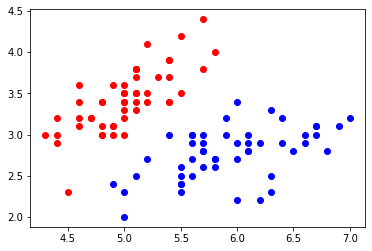

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=10**9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000)

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


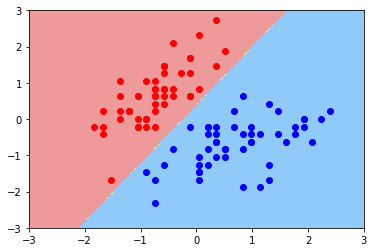

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

### Soft Margin SVM (c->0)

In [8]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


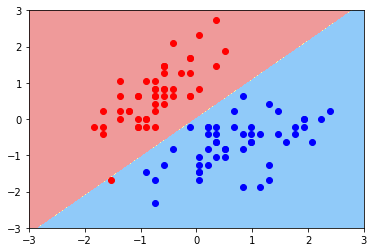

In [9]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [10]:
svc.coef_

array([[ 4.03241461, -2.50699052]])

In [11]:
svc.intercept_

array([0.92736191])

###### 3）绘制支撑向量所在的直线

+ svc.coef_：算法模型的系数，有两个值，因为样本有两种特征，每个特征对应一个系数；
+ 系数：特征与样本分类结果的关系系数；
+ svc.intercept_：模型的截距，一维向量，只有一个数，因为只有一条直线；
+ 系数：w = svc.coef_
+ 截距：b = svc.intercept_
+ 决策边界直线方程：w[0] * x0 + w[1] * x1 + b = 0
+ 支撑向量直线方程：w[0] * x0 + w[1] * x1 + b = ±1
+ 变形：
+ 决策边界：x1 = -w[0]/w[1] * x0 - b/w[1]
+ 支撑向量：x1 = -w[0]/w[1] * x0 - b/w[1] ± 1/w[1]

In [12]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    # 将 plot_x 与 up_y、down_y 的关系以折线图的形式表示出来
    # 此处有一个问题：up_y和down_y的结果可能超过了 axis 中 y 坐标的范围，需要添加一个过滤条件：
    # up_index：布尔向量，元素 True 表示，up_y 中的满足 axis 中的 y 的范围的值在 up_y 中的引索；
    # down_index：布尔向量，同理 up_index;
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


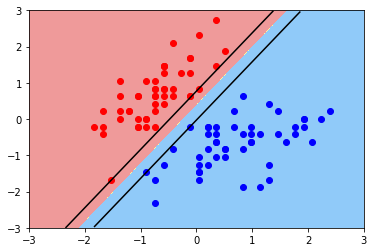

In [13]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


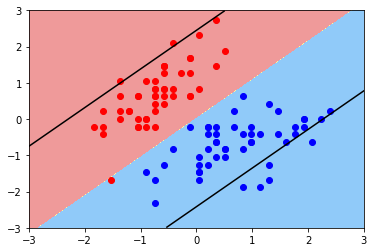

In [14]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [15]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies t

## Polynomial in SVM

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from sklearn import datasets

X, y = datasets.make_moons()

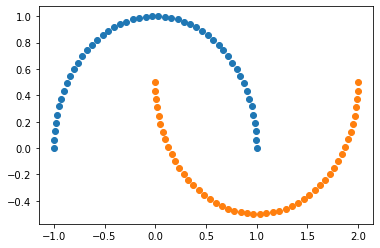

In [18]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

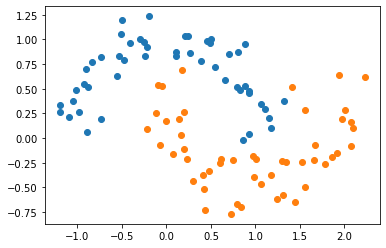

In [19]:
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [20]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [21]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [22]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

In [23]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


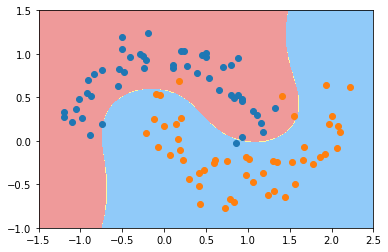

In [24]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## Polynomial Kernel SVM

SVC() 算法：直接使用多项式特征；

In [25]:
from sklearn.svm import SVC

In [26]:
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

In [27]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


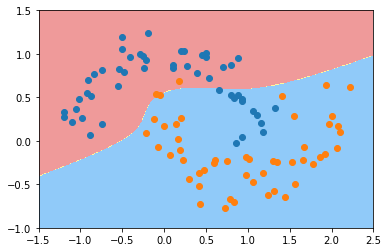

In [28]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()